#### 로지스틱 회귀
- 선형 모델 기반으로 분류를 해주는 모델
- 종속변수 즉 타겟이 범주형 인 경우에 적용
- 결과를 확률로 변환해서 처리해줌
- 종류  
    -이진 분류 : 타겟의 클래스가 2개  
    -다중 분류 : 타겟의 클래스가 3개 이상  
    

In [56]:
import pandas as pd

# 판다스에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format


# 데이터 준비
DATA_FILE = '../data/fish.csv'
fishdf = pd.read_csv(DATA_FILE)
fishdf.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,29.00000,34.00000,12.44400,5.13400


In [57]:
# 타겟/종속 변수의 클래스수 -> 7개
print(pd.unique(fishdf['Species']))
featuredf = fishdf[fishdf.columns[1:]].to_numpy()
# fishdf.columns[1:]
print(featuredf[:5])

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [58]:
target = fishdf['Species'].to_numpy()
print(target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuredf, target, random_state=10, stratify=target)

In [60]:
from sklearn.preprocessing import StandardScaler

#학습용 기반 스케일러 생성
model = StandardScaler()
model.fit(X_train)

# 스케일링
train_scaled = model.transform(X_train)
test_scaled = model.transform(X_test)

### 로지스틱 회귀
- 학습 진행
- 학습 방법 : 지도 학습의 분류
- 학습 알고리즘 : 로지스틱 회귀

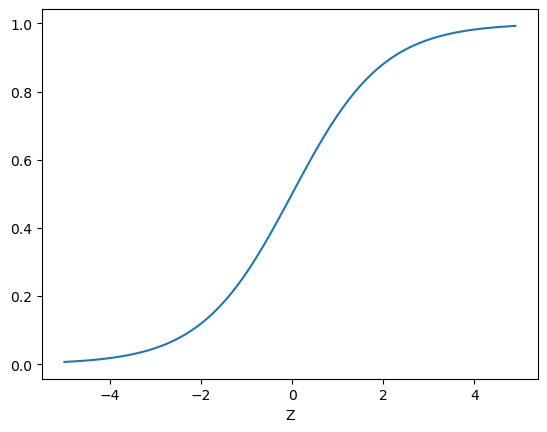

z -> [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]
 phi = [0.006693 0.007392 0.008163 0.009013 0.009952 0.010987 0.012128 0.013387
 0.014774 0.016302 0.017986 0.01984  0.021881 0.024127 0.026597 0.029312
 0.032295 0.035571 0.039166 0.043107 0.047426 0.052154 0.057324 0.062973
 0.069138 0.075858 0.083173 0.091123 0.09975  0.109097 0.119203 0.130108
 0.141851 0.154465 0.167982 0.182426 0.197816 0.214165 0.231475 0.24974
 0.268941 0.28905  0.310026 0.331812 0.354344 0.377541 0.401312 0.425557
 0.450166 0.475021 0.5      0.524979 0.549

In [61]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)

# 선형식의 결과값 -> 0.0~1.0 범위의 확률 값으로 바꾸겠다.
z = np.arange(-5, 5, 0.1) # -5.0 <= ~ <5.0
phi = 1 / (1 + np.exp(-z)) #p 확률 값

plt.plot(z, phi)
plt.xlabel('Z')
plt.show()

print(f'z -> {z}\n phi = {phi}')

In [62]:
# 로지스틱 회귀로 이진 분류 수행하기


In [63]:
# Boolean Index
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [64]:
## 2진 분류 -> 2개 품종의 데이터셋 추출
mask = (y_train == 'Bream') | (y_train == 'Smelt')

train_bream_smelt = train_scaled[mask]
target_bream_smelt = y_train[mask]

mask = (y_test == 'Bream') | (y_test == 'Smelt')
test_bream_smelt = test_scaled[mask]
test_target_bream_smelt = y_test[mask]

In [65]:
# 학습진행
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(f'classes_ : {lr.classes_}')
print(f'n_features_in_: {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}')
print(f'coef_: {lr.coef_}')
print(f'intercept_ : {lr.intercept_}')

# 모델의 성능 -> train과 test에 대한 분류의 정확도 확인
# 내부에서 predict 호출 -> 예측값과 target 값 비교
train_score = lr.score(train_bream_smelt, target_bream_smelt)
test_score = lr.score(test_bream_smelt, test_target_bream_smelt)

print()

print(f' {train_score}  {test_score}')

# 테스팅 진행
# predict(피쳐)
# - predict() : 예측 클래스 반환
# - predict_proba() : 각 클래스별 확률 값
# - decision_funtion : 피쳐와 coef_ 곱셈 합계 + intercept_ 한 결과 값

print()

print(lr.predict(train_bream_smelt[:5]))
print(lr.classes_, lr.predict_proba(train_bream_smelt[:5]), sep='\n')

print()

# y = F1*coef_[0] + 컬럼*coef_[1] +...+ 컬럼*coef_[4] -> 커피션트 다 곱한거
# F1 = 'Weight'
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

classes_ : ['Bream' 'Smelt']
n_features_in_: 5
n_iter_ : [13]
coef_: [[-0.443163 -0.600773 -0.684162 -1.027121 -0.767243]]
intercept_ : [-2.230105]

 1.0  1.0

['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt']
[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]

[ 3.414347  2.585481 -7.588453 -2.66151  -5.117616]


In [66]:
# 선형식 결과값 -> 확률 변환 , 클래스가 1인 것에 대한 확률 계산
from scipy.special import expit
print(expit(decisions))


print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict(train_bream_smelt[:5]))

[0.96815  0.929921 0.000506 0.065283 0.005955]
[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]
['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


### 로지스틱 회귀로 다중 분류 수행하기


In [68]:
# OvR 방식 (5개 : 2진 분류 5번, 10개 : 2진 분류 10번, n개 : 2진 분류 n번)
# OvO 방식(5개 분류 -> 5 * (5-1)/2 = 10개의 2진분류, 10개 분류 -> 10*(10-1)/2 = 45개의 2진분류)
# OvR, OvA
# 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 모델 생성
ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, y_train)

# 모델 파라미터 출력
print(ovr_clf.estimators_)
print(ovr_clf.classes_)
print(ovr_clf.n_classes_)

# 각 이진 분류기의 회귀 계수와 절편을 출력
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

# 결정 점수를 구하고 예측값을 출력
decision_scores = ovr_clf.decision_function(X_test[:2])
print(decision_scores)

# 예측 확률 출력
proba = ovr_clf.predict_proba(X_test[:2])
print(proba.max(axis=1))  # 각 샘플에서 가장 높은 확률
print(proba.argmax(axis=1))  # 각 샘플에서 가장 높은 확률을 가진 클래스의 인덱스




[LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000)]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
7
[0 분류기] [[-0.014442 -0.596079  0.895693  1.630172  0.006896]] [-25.674484]
[1 분류기] [[-0.021971  0.27047  -0.876247  2.182859 -0.10419 ]] [-0.335551]
[2 분류기] [[-0.001612  2.535281 -2.623366 -0.044586  2.12291 ]] [-0.262153]
[3 분류기] [[-0.020627  0.522572  0.652138 -0.54899  -0.145613]] [-29.896075]
[4 분류기] [[-0.033032 -1.424856  1.559057 -0.264718  1.842121]] [-7.265598]
[5 분류기] [[-0.080179  0.150523  0.284997 -1.503039 -0.717767]] [1.675293]
[6 분류기] [[ 0.001316 -0.267125  0.184426 -0.143248  0.602584]] [-3.306768]
[[  5.110919  -4.341704  -6.53204  -10.578214  -8.490762 -58.2226
   -3.053428]
 [  6.337838  -7.555448  -7.870693  -9.751023 -10.498159 -68.46438
   -2.854831]]
[0.943431